In [371]:
%matplotlib inline

import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import psycopg2
import textatistic
import seaborn as sbn
import requests
from bs4 import BeautifulSoup
import re
matplotlib.style.use('ggplot')
py.offline.init_notebook_mode()

In [372]:
lutheracademics = requests.get("http://www.luther.edu/catalog/curriculum/")
tomatosoup = BeautifulSoup(lutheracademics.text, 'html.parser')
majors = tomatosoup.find_all('ul', class_="childrenList childrenListWithAZ")[0]

In [373]:
listofmajors = []
for major in majors.find_all('a'):
    dept = major.get('href', 'None')
    if dept != 'None':
        listofmajors.append(dept)

In [374]:
crs = pd.DataFrame(columns=['department','course','number','credits','geneds','prerequisites','description'])

In [375]:
def lutherclass(chickennoodlesoup, name):
    department = chickennoodlesoup.find_all('h1', class_='pageTitle')[0].text
    courses = chickennoodlesoup.find_all('div', class_='courseContainer')
    for i in courses:
        course = i.find_all('span', class_='courseTitle')[0].text
        number = i.find_all('span', class_='courseNumber')[0].text
        credits = i.find_all('li')[0].text
        for part in i.find_all('li'):
            if part.find_all('i', class_='fa-li fa fa-book fa-lg') != []:
                prerequisites = part.text.split(' ')[1:]
                prerequisites = ' '.join(prerequisites)
            else:
                prerequisites = ''
        description = i.find_all('span', class_='courseDescription')[0].text
        genedlist = []
        for content in i.find_all('span', class_='genEd'):
            genedlist.append(content.text)
        geneds = ', '.join(genedlist)
        crs.loc[name] = [department, course, number, credits, geneds, prerequisites, description]
        name += 1
    return name

In [376]:
name = 0
for major in listofmajors:
    x = ("https://www.luther.edu/catalog/curriculum/")
    y = major
    xplusy = x+y
    cheesybroccoli = BeautifulSoup(requests.get(xplusy).text, 'html.parser')
    name = find_classes(cheesybroccoli, name)

In [377]:
crs.head(10)

department                                            course     number  \
0  Accounting                        Introduction to Accounting  ACCTG 110   
1  Accounting                        Fundamentals of Accounting  ACCTG 150   
2  Accounting                      Managerial Cost Accounting I  ACCTG 250   
3  Accounting                         Intermediate Accounting I  ACCTG 353   
4  Accounting                        Intermediate Accounting II  ACCTG 354   
5  Accounting  Accounting for Government and Nonprofit Entities  ACCTG 357   
6  Accounting                     Managerial Cost Accounting II  ACCTG 358   
7  Accounting                               Advanced Accounting  ACCTG 365   
8  Accounting                   Auditing and Assurance Services  ACCTG 467   
9  Accounting                           Federal Income Taxation  ACCTG 468   

   credits geneds                     prerequisites  \
0  2 hours         First-year or sophomore standing   
1  4 hours                                ACCTG 110   
2  4 hours                                ACCTG 150   
3  4 hours            ACCTG 250 and junior standing   
4  4 hours                                ACCTG 353   
5  2 hours            ACCTG 150 and junior standing   
6  4 hours                                ACCTG 250   
7  4 hours                                ACCTG 354   
8  4 hours            ACCTG 354 and senior standing   
9  4 hours            ACCTG 354 and senior standing   

                                         description  
0  A course specifically for students who have ha...  
1  The course provides a basic understanding of f...  
2  This course examines the central role of manag...  
3  Deals with financial accounting concepts and p...  
4  Further coverage of financial accounting conce...  
5  Introduction to governmental and nonprofit acc...  
6  Advanced course in managerial and cost account...  
7  Accounting for mergers and consolidations, par...  
8  Emphasizes the analysis of an entity's  busine...  
9  Analysis of the individual income tax, with em...

In [378]:
crs.tail(10)

department  \
922  Women and Gender Studies   
923  Women and Gender Studies   
924  Women and Gender Studies   
925  Women and Gender Studies   
926  Women and Gender Studies   
927  Women and Gender Studies   
928  Women and Gender Studies   
929  Women and Gender Studies   
930  Women and Gender Studies   
931  Women and Gender Studies   

                                              course    number  \
922                                   God and Gender  WGST 337   
923            Gendered Activism in a Global Context  WGST 350   
924                                 Gender and Crime  WGST 351   
925              Women, Representation, and Politics  WGST 354   
926                  Chaucer and Medieval Literature  WGST 361   
927                                    Gender in Art  WGST 368   
928                                       Internship  WGST 381   
929  Seminar: Gender, Globalization, and Development  WGST 468   
930      Seminar: Topics in Women and Gender Studies  WGST 485   
931                                   Senior Project  WGST 490   

              credits                                             geneds  \
922           4 hours          Religion, Human Expression, Intercultural   
923           4 hours                      Human Behavior, Intercultural   
924           4 hours              Human Behavior—Social Science Methods   
925           4 hours              Human Behavior—Social Science Methods   
926           4 hours                     Human Expression—Primary Texts   
927           4 hours                     Human Expression—Primary Texts   
928  1, 2, or 4 hours                                                      
929           4 hours  Human Behavior—Social Science Methods, Intercu...   
930           4 hours                                                      
931  1, 2, or 4 hours                                                      

                    prerequisites  \
922        REL 101 and 111 or 112   
923                                 
924                       SOC 101   
925                                 
926               Junior standing   
927           ART 252 or WGST 130   
928                                 
929                       SOC 101   
930  WGST 130 and junior standing   
931                                 

                                           description  
922  An investigation of how our understanding and ...  
923  This course will explore varied expressions of...  
924  Examines how gender affects individuals' exper...  
925  This course explores the role of gender in pol...  
926  From heroes fighting monsters to Arthurian rom...  
927  Taking Linda Nochlin's seminal essay, "Why Hav...  
928  Required for the WGST major. Each WGST major w...  
929  In this course we will examine the phenomena o...  
930  An interdisciplinary seminar on women's social...  
931

In [379]:
g = nx.DiGraph()
g.add_nodes_from(crs.number)

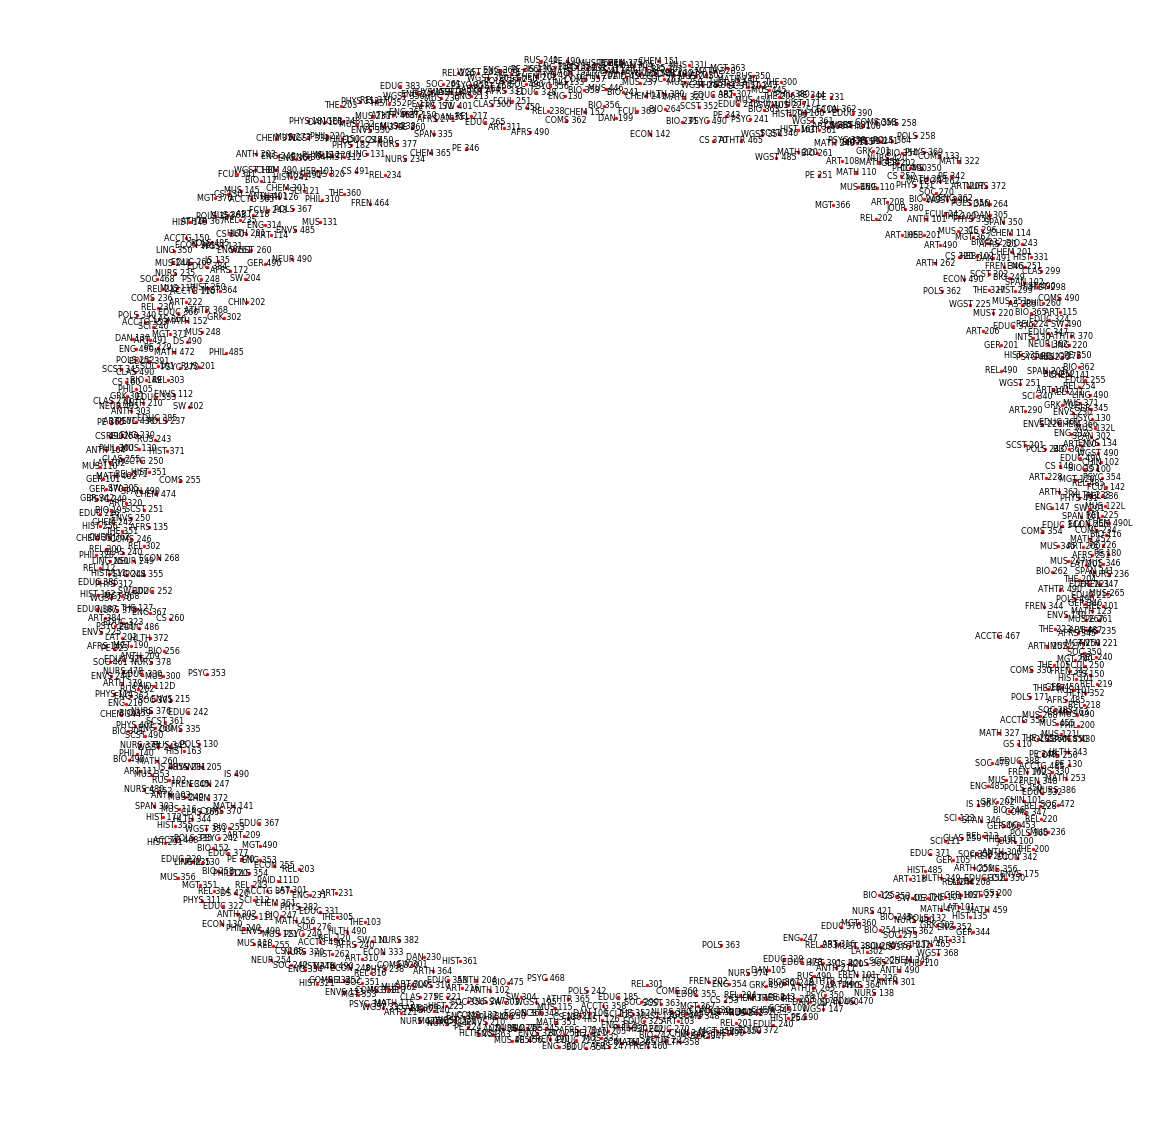

In [380]:
gfig, gax = plt.subplots(figsize=(20,20))
nx.draw(g,nx.spring_layout(g,k=0.4),ax=gax,with_labels=True,font_size=8,node_size=8)

In [381]:
crs.to_csv('lutheracademics.csv', encoding='utf-8')

In [382]:
crs[crs.prerequisites == ''].count()

department       352
course           352
number           352
credits          352
geneds           352
prerequisites    352
description      352
dtype: int64

In [383]:
crs.groupby('department')['course'].count().sort_values(ascending=True)

department
Intersections                1
Asian Studies                1
Journalism                   2
General Studies              3
Hebrew                       3
Paideia                      3
Museum Studies               3
Data Science                 4
Chinese                      5
Neuroscience                 5
International Studies        6
Greek                        7
Latin                        7
Linguistics                  7
Art History                  8
Athletic Training           10
Russian Studies             10
Foreign Culture             10
Classics                    11
Science                     11
Accounting                  12
Social Work                 13
French                      13
Scandinavian Studies        13
German                      14
Economics                   14
Dance                       14
Spanish                     14
Health                      15
Environmental Studies       16
Africana Studies            16
Anthropology                

In [384]:
crs['interdepartmentalrelationship'] = pd.Series(crs.number, index=crs.index)

In [385]:
relationshipdictionary = {}

In [386]:
classcodelist = []
for i in range(len(crs.index)):
    classcode = crs.loc[i].number.split(' ')[0]
    if classcode not in classcodelist:
        classcodelist.append(classcode)

In [387]:
for i in classcodelist:
    relationshipdictionary[i] = []

In [388]:
for i in range(len(crs.index)):
    des = crs.loc[i].prerequisites.split(' ')
    classcode = crs.loc[i].number.split(' ')[0]
    for item in des:
        if item in classcodelist and des != [''] and item != classcode:
            if item not in relationshipdictionary[classcode]:
                relationshipdictionary[classcode].append(item)

In [389]:
print(relationshipdictionary)

{'ACCTG': [], 'PHYS': ['MATH'], 'SOC': ['COMS', 'MATH'], 'POLS': [], 'SW': ['POLS', 'SOC'], 'JOUR': [], 'ANTH': [], 'DS': ['CS', 'MATH'], 'AS': [], 'GS': [], 'WGST': ['PAID', 'REL', 'SOC', 'PHIL', 'PSYC', 'COMS', 'ART'], 'MATH': ['BIO', 'PSYC', 'SOC', 'ECON', 'MGT', 'CS'], 'PSYC': ['MATH'], 'DAN': ['THE', 'ART'], 'CHEM': ['BIO', 'MATH', 'PHYS'], 'ATHTR': ['PE'], 'EDUC': ['PAID', 'MUS', 'ART', 'PE', 'HLTH'], 'HLTH': ['EDUC'], 'PE': ['EDUC', 'BIO'], 'NURS': ['BIO', 'HLTH', 'PSYC', 'SCI'], 'MUS': ['EDUC'], 'CLAS': ['PAID'], 'MUST': [], 'SPAN': [], 'CHIN': [], 'HEB': [], 'CS': ['MATH'], 'ART': ['EDUC', 'THE'], 'REL': ['PAID'], 'GER': [], 'FCUL': ['PAID'], 'LAT': [], 'MGT': ['ACCTG', 'MATH', 'ECON'], 'IS': ['ANTH', 'ECON', 'POLS'], 'FREN': [], 'PAID': [], 'PHIL': [], 'INTS': [], 'NEUR': ['PSYC', 'BIO'], 'RUS': [], 'LING': [], 'GRK': [], 'AFRS': ['PAID', 'SOC'], 'ARTH': ['WGST'], 'SCI': ['MATH', 'BIO', 'NURS'], 'ENVS': ['MATH', 'CHEM', 'PAID', 'PHIL', 'POLS', 'BIO'], 'SCST': ['PAID'], 'HIST'

In [390]:
crs.head(10)

department                                            course     number  \
0  Accounting                        Introduction to Accounting  ACCTG 110   
1  Accounting                        Fundamentals of Accounting  ACCTG 150   
2  Accounting                      Managerial Cost Accounting I  ACCTG 250   
3  Accounting                         Intermediate Accounting I  ACCTG 353   
4  Accounting                        Intermediate Accounting II  ACCTG 354   
5  Accounting  Accounting for Government and Nonprofit Entities  ACCTG 357   
6  Accounting                     Managerial Cost Accounting II  ACCTG 358   
7  Accounting                               Advanced Accounting  ACCTG 365   
8  Accounting                   Auditing and Assurance Services  ACCTG 467   
9  Accounting                           Federal Income Taxation  ACCTG 468   

   credits geneds                     prerequisites  \
0  2 hours         First-year or sophomore standing   
1  4 hours                                ACCTG 110   
2  4 hours                                ACCTG 150   
3  4 hours            ACCTG 250 and junior standing   
4  4 hours                                ACCTG 353   
5  2 hours            ACCTG 150 and junior standing   
6  4 hours                                ACCTG 250   
7  4 hours                                ACCTG 354   
8  4 hours            ACCTG 354 and senior standing   
9  4 hours            ACCTG 354 and senior standing   

                                         description  \
0  A course specifically for students who have ha...   
1  The course provides a basic understanding of f...   
2  This course examines the central role of manag...   
3  Deals with financial accounting concepts and p...   
4  Further coverage of financial accounting conce...   
5  Introduction to governmental and nonprofit acc...   
6  Advanced course in managerial and cost account...   
7  Accounting for mergers and consolidations, par...   
8  Emphasizes the analysis of an entity's  busine...   
9  Analysis of the individual income tax, with em...   

  interdepartmentalrelationship  
0                     ACCTG 110  
1                     ACCTG 150  
2                     ACCTG 250  
3                     ACCTG 353  
4                     ACCTG 354  
5                     ACCTG 357  
6                     ACCTG 358  
7                     ACCTG 365  
8                     ACCTG 467  
9                     ACCTG 468

In [391]:
# begin with same code as earlier
lutheracademics = requests.get("http://www.luther.edu/catalog/curriculum/")
tomatosoup = BeautifulSoup(lutheracademics.text, 'html.parser')
majors = tomatosoup.find_all('ul', class_="childrenList childrenListWithAZ")[0]

listofmajors = []
for major in majors.find_all('a'):
    dept = major.get('href', 'None')
    if dept != 'None':
        listofmajors.append(dept)

In [392]:
def nonrequisites(frenchonion, deptlist):
    try:
        classcode = frenchonion.find_all('span', class_='courseNumber')[0].text.split(' ')[0]
        deptlist[classcode] = []
        classes = re.findall(r'[A-Z]{2,5} \d{3}', frenchonion.find_all('div', class_='catalog_block')[1].text)
        for item in classes:
            if item.split(' ')[0] not in deptlist[classcode] and item.split(' ')[0] != classcode:
                deptlist[classcode].append(item.split(' ')[0])
    except:
        pass
    return deptlist

In [393]:
deptlist = {}
for major in listofmajors:
    x = ("https://www.luther.edu/catalog/curriculum/")
    y = major
    xplusy = x+y
    frenchonion = BeautifulSoup(requests.get(xplusy).text, 'html.parser')
    deptlist = nonrequisites(frenchonion, deptlist)

In [394]:
relationshipdictionary2 = relationshipdictionary
for i in relationshipdictionary2:
    for item in deptlist:
        for code in deptlist[item]:
            if code not in relationshipdictionary2[i] and i == item:
                relationshipdictionary2[i].append(code)
print(relationshipdictionary2)

{'ACCTG': ['ECON', 'MGT', 'MATH', 'COMS', 'SOC', 'POLS', 'PSYC'], 'PHYS': ['MATH'], 'SOC': ['COMS', 'MATH', 'PSYC'], 'POLS': [], 'SW': ['POLS', 'SOC', 'BIO', 'PSYC', 'ECON', 'MATH'], 'JOUR': ['COMS', 'ENG', 'ART', 'POLS', 'ECON', 'MATH'], 'ANTH': [], 'DS': ['CS', 'MATH', 'BIO', 'MGT', 'PSYC', 'SOC', 'COMS', 'ECON'], 'AS': ['CHIN', 'PAID', 'FCUL', 'HIST', 'REL'], 'GS': [], 'WGST': ['PAID', 'REL', 'SOC', 'PHIL', 'PSYC', 'COMS', 'ART', 'FREN'], 'MATH': ['BIO', 'PSYC', 'SOC', 'ECON', 'MGT', 'CS', 'EDUC'], 'PSYC': ['MATH', 'BIO', 'PHYS', 'CHEM', 'ENVS', 'SCI'], 'DAN': ['THE', 'ART'], 'CHEM': ['BIO', 'MATH', 'PHYS'], 'ATHTR': ['PE', 'BIO', 'HLTH'], 'EDUC': ['PAID', 'MUS', 'ART', 'PE', 'HLTH', 'HIST', 'MATH'], 'HLTH': ['EDUC', 'PE', 'MGT'], 'PE': ['EDUC', 'BIO', 'HLTH', 'CHEM', 'PHYS', 'MATH', 'PSYC', 'PAID'], 'NURS': ['BIO', 'HLTH', 'PSYC', 'SCI'], 'MUS': ['EDUC'], 'CLAS': ['PAID', 'ART', 'HIST', 'MUS', 'PHIL', 'GRK', 'LAT'], 'MUST': ['HIST', 'ANTH', 'ART', 'THE', 'ENVS', 'BIO', 'SCI'], 'SPA

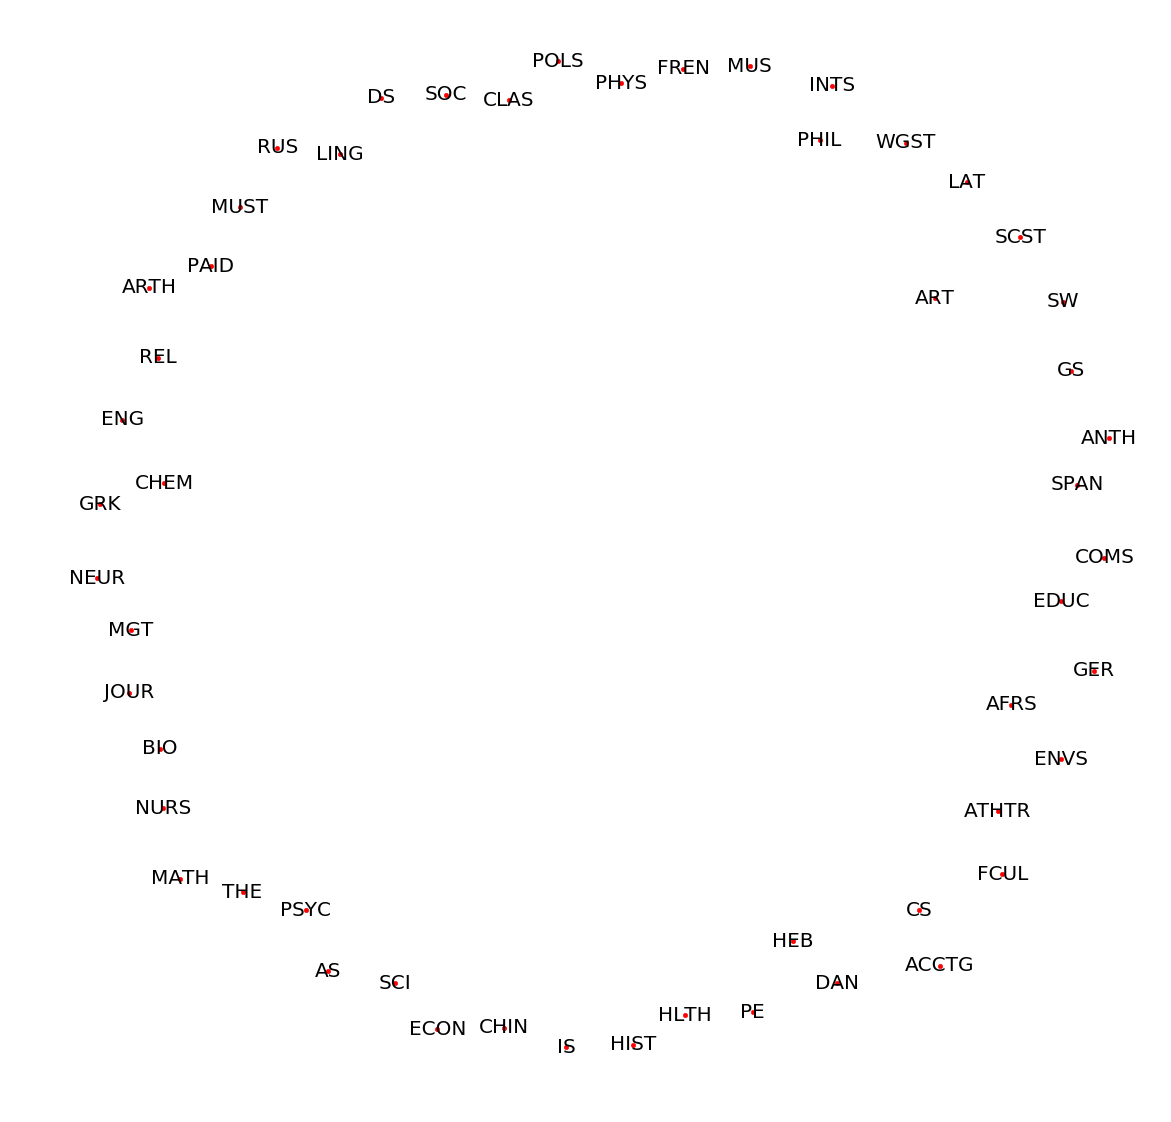

In [395]:
h = nx.DiGraph()
h.add_nodes_from(relationshipdictionary2)
gfig, gax = plt.subplots(figsize=(20,20))
nx.draw(h,nx.spring_layout(h,k=0.4),ax=gax,with_labels=True,font_size=20,node_size=20)

In [396]:
for i in relationshipdictionary2:
    for item in relationshipdictionary2[i]:
        h.add_edge(i, item)

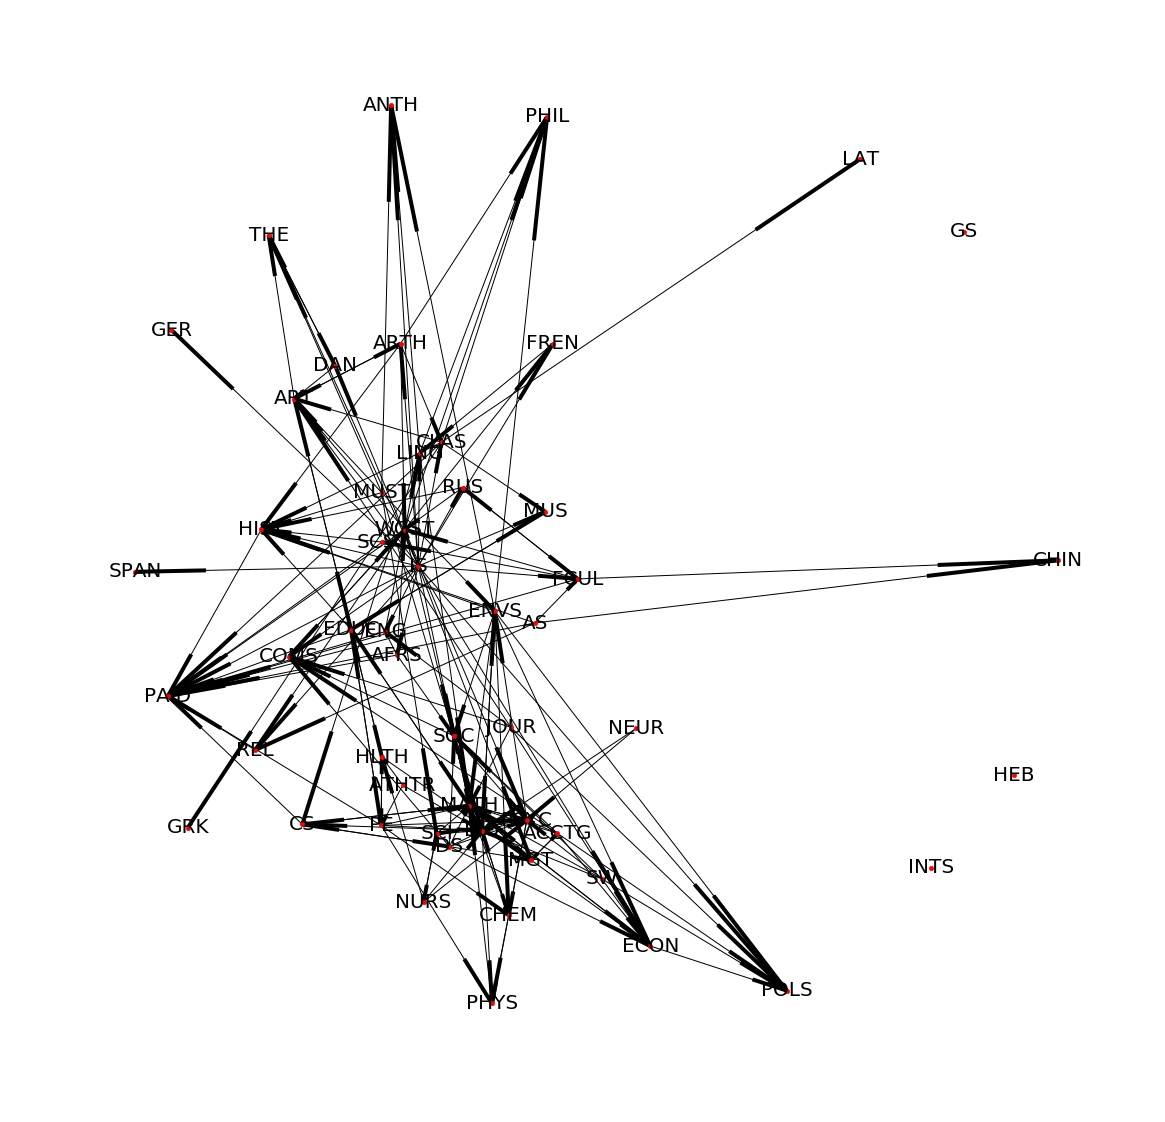

In [397]:
gfig, gax = plt.subplots(figsize=(20,20))
nx.draw(h,nx.spring_layout(h,k=0.4),ax=gax,with_labels=True,font_size=20,node_size=20)